### about all the feautures description
age​: the age of an individual

● workclass​: a general term to represent the employment status of an individual
○ Private, Self­emp­not­inc, Self­emp­inc, Federal­gov, Local­gov, State­gov,
Without­pay, Never­worked.

● fnlwgt​: final weight. In other words, this is the number of people the census believes
the entry represents..

● education​: the highest level of education achieved by an individual.
○ Bachelors, Some­college, 11th, HS­grad, Prof­school, Assoc­acdm, Assoc­voc,
9th, 7th­8th, 12th, Masters, 1st­4th, 10th, Doctorate, 5th­6th, Preschool.

● marital­status​: marital status of an individual. Married­civ­spouse corresponds to a
civilian spouse while Married­AF­spouse is a spouse in the Armed Forces
○ Married­civ­spouse, Divorced, Never­married, Separated, Widowed,
Married­spouse­absent, Married­AF­spouse.

● occupation​: the general type of occupation of an individual
○ Tech­support, Craft­repair, Other­service, Sales, Exec­managerial,
Prof­specialty, Handlers­cleaners, Machine­op­inspct, Adm­clerical,
Farming­fishing, Transport­moving, Priv­house­serv, Protective­serv,
Armed­Forces.

● relationship​: represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship attribute and is
somewhat redundant with marital status. We might not make use of this attribute at all
○ Wife, Own­child, Husband, Not­in­family, Other­relative, Unmarried.

● race​: Descriptions of an individual’s race
○ White, Asian­Pac­Islander, Amer­Indian­Eskimo, Other, Black.

● sex​: the biological sex of the individual
○ Male, Female

● capital­gain​: capital gains for an individual
○ Integer greater than or equal to 0

● capital­loss​: capital loss for an individual
○ Integer greater than or equal to 0

● hours­per­week​: the hours an individual has reported to work per week
○ continuous.

● native­country​: country of origin for an individual
○ United­States, Cambodia, England, Puerto­Rico, Canada, Germany,
Outlying­US(Guam­USVI­etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican­Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El­Salvador,
Trinadad&Tobago, Peru, Hong, Holand­Netherlands.

● the label or our target: whether or not an individual makes more than $50,000 annually.
○ <=50k, >50k


### • Project Description:
Problem statement: Create a classification model to predict whether a person makes over $50k a
year


### importing dataframe

### importing crucial libraries

In [162]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [163]:
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir();
df=pd.read_csv('adult.csv')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [164]:
 df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### firstly we rename the column names

In [165]:
 df= df.rename({'39':'age',' State-gov':'workclass',' 77516':'fnlwgt',
                          ' Bachelors':'Education',
                         ' 13':'education_num',
                         ' Adm-clerical':'occupation',
                          ' Never-married':'marital_status',
                         ' Not-in-family':'relationship',
                          ' White':'race',
                          ' Male':'sex',
                          ' 2174':'capital_gain',
                         ' 0':'capital_loss',
                          ' 40':'hours_per_week',
                          ' United-States':'native_country',
                          ' <=50K':'Target'},axis=1)

In [166]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  Target          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [167]:
df

,age,workclass,fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### finally,we rename the columns  with  meaningful names based on the rowinformation

In [168]:
df.tail(10)

,age,workclass,fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### null values

In [169]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Target            0
dtype: int64

In [170]:
## we have no null values 

### duplicates

In [171]:
df.duplicated().sum()

24

### we have 24 duplictes lets drop

In [172]:
df.drop_duplicates(inplace=True)

In [173]:
df

,age,workclass,fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [174]:
df.shape

(32536, 15)

In [175]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'Target'],
      dtype='object')

### unique values in  the dataframe

In [176]:
for i in  df.columns:
    print(i,'-----',df[i].nunique())

age ----- 73
workclass ----- 9
fnlwgt ----- 21647
Education ----- 16
education_num ----- 16
marital_status ----- 7
occupation ----- 15
relationship ----- 6
race ----- 5
sex ----- 2
capital_gain ----- 119
capital_loss ----- 92
hours_per_week ----- 94
native_country ----- 42
Target ----- 2


### categorical values


In [177]:
df.describe(include='object')

,workclass,Education,marital_status,occupation,relationship,race,sex,native_country,Target
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


### numerical values

In [178]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [179]:
df

,age,workclass,fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### univariate analysis

In [180]:
df

,age,workclass,fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [181]:
 df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

C:\Users\63094\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

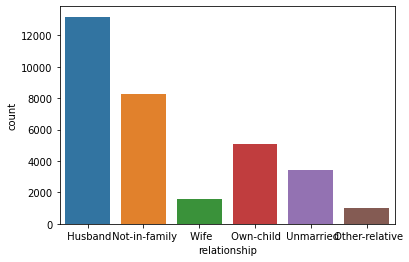

In [182]:
sns.countplot(df['relationship'])

C:\Users\63094\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

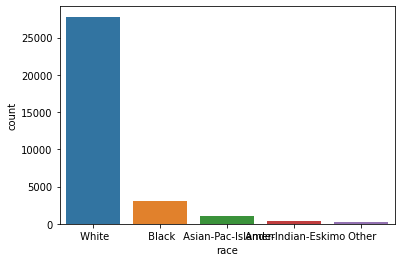

In [183]:
sns.countplot(df['race'])

C:\Users\63094\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

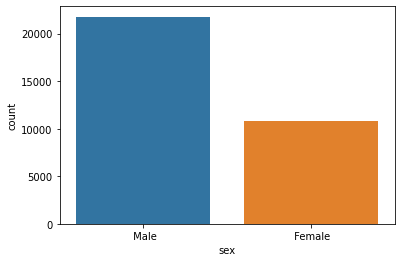

In [184]:
sns.countplot(df['sex'])

C:\Users\63094\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

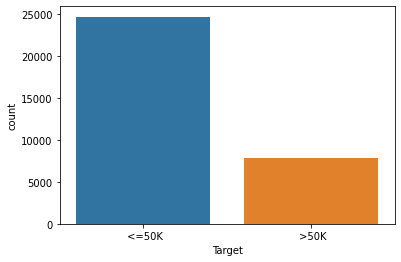

In [185]:
sns.countplot(df['Target'])

In [186]:
df['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

<AxesSubplot:xlabel='education_num', ylabel='Count'>

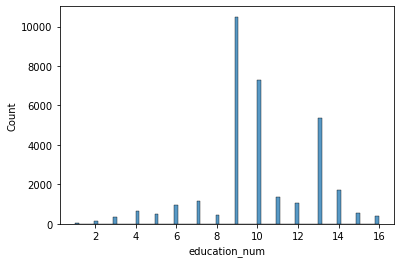

In [187]:
sns.histplot(df['education_num'])

<AxesSubplot:xlabel='capital_gain', ylabel='Count'>

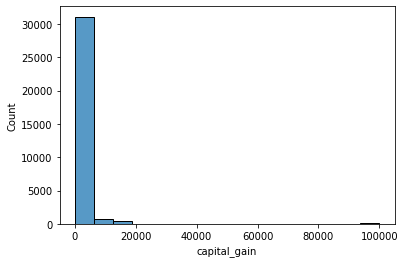

In [188]:
sns.histplot(df['capital_gain'])

<AxesSubplot:xlabel='capital_loss', ylabel='Count'>

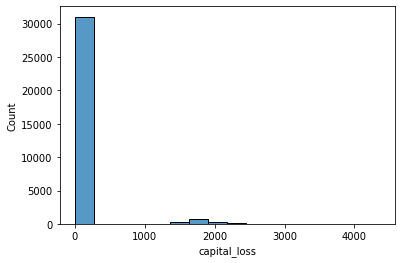

In [189]:
sns.histplot(df['capital_loss'])

<AxesSubplot:xlabel='hours_per_week', ylabel='Count'>

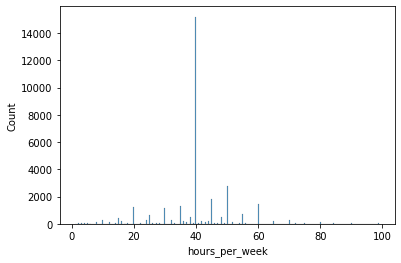

In [190]:
 sns.histplot(df['hours_per_week'])

In [191]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [192]:
df['occupation'].fillna(value = 'Prof-specialty', inplace = True)

In [193]:
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

## bivarient analysis based on target

<AxesSubplot:xlabel='count', ylabel='relationship'>

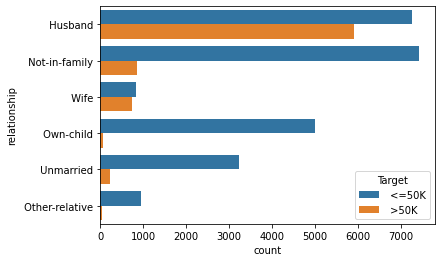

In [194]:
sns.countplot(hue=df['Target'],y=df['relationship'])

<AxesSubplot:xlabel='count', ylabel='occupation'>

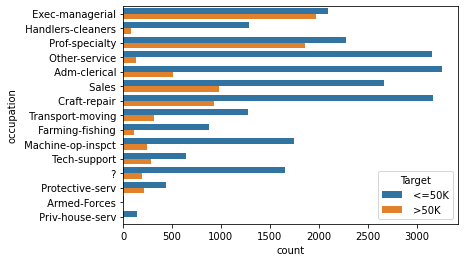

In [195]:
sns.countplot(hue=df['Target'],y=df['occupation'])

<AxesSubplot:xlabel='count', ylabel='Education'>

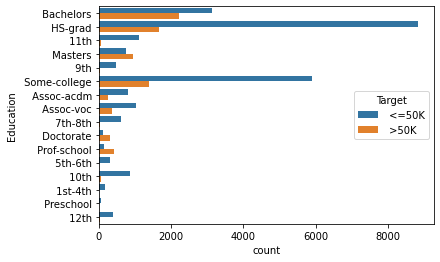

In [196]:
sns.countplot(hue=df['Target'],y=df['Education'])

<AxesSubplot:xlabel='count', ylabel='marital_status'>

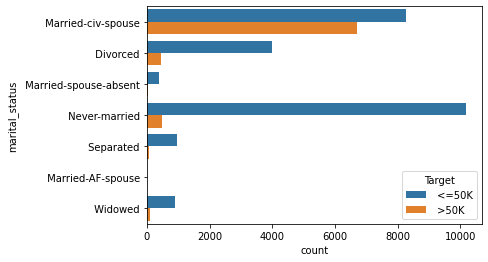

In [197]:
sns.countplot(hue=df['Target'],y=df['marital_status'])

<AxesSubplot:xlabel='count', ylabel='occupation'>

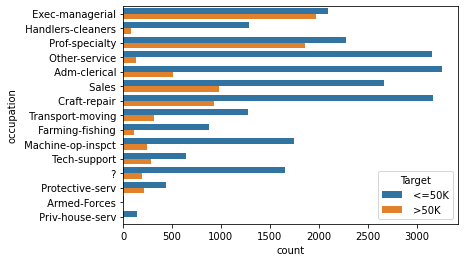

In [198]:
sns.countplot(hue=df['Target'],y=df['occupation'])

<AxesSubplot:xlabel='count', ylabel='relationship'>

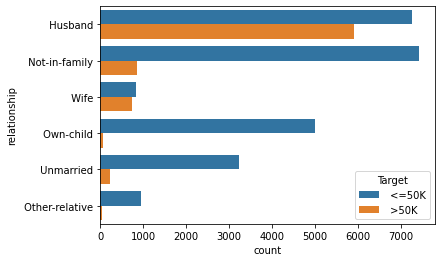

In [199]:
sns.countplot(hue=df['Target'],y=df['relationship'])

<AxesSubplot:xlabel='count', ylabel='race'>

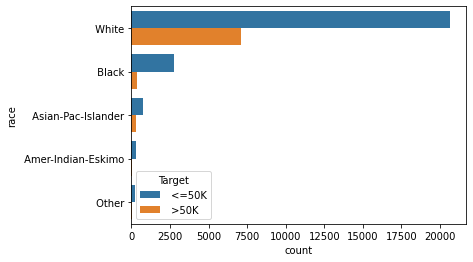

In [200]:
sns.countplot(hue=df['Target'],y=df['race'])

<AxesSubplot:xlabel='count', ylabel='sex'>

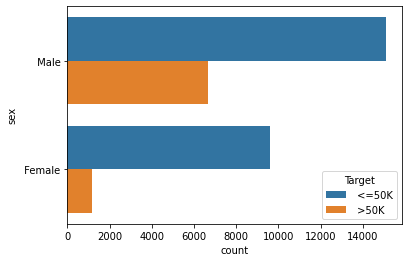

In [201]:
sns.countplot(hue=df['Target'],y=df['sex'])

<AxesSubplot:xlabel='capital_gain', ylabel='Target'>

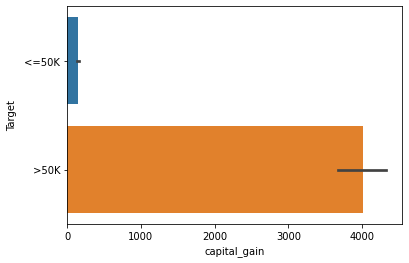

In [202]:
sns.barplot(x=df['capital_gain'],y=df['Target'])

<AxesSubplot:xlabel='capital_loss', ylabel='Target'>

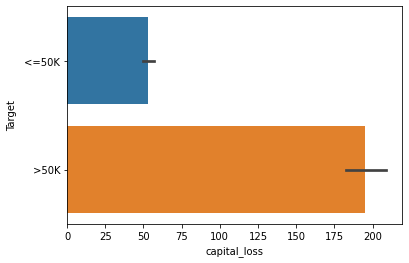

In [203]:
sns.barplot(x=df['capital_loss'],y=df['Target'])

<AxesSubplot:xlabel='hours_per_week', ylabel='Target'>

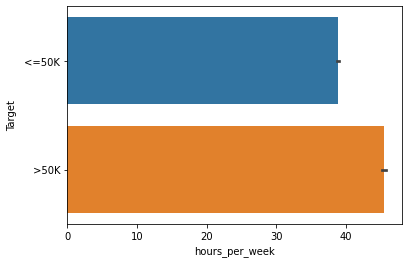

In [204]:
sns.barplot(x=df['hours_per_week'],y=df['Target'])

### we draw the bivarient analysis and we see some insighths by these diagrams

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900
education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426
capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408
capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229
hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000


<AxesSubplot:>

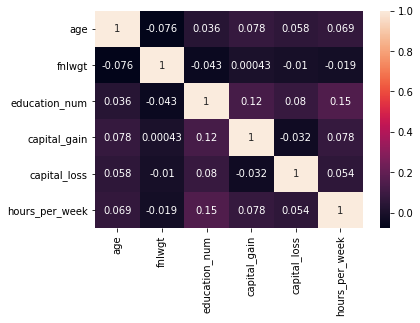

In [207]:
sns.heatmap(df.corr(),annot=True)

### dropping un relevent or unused columns

In [208]:
df.drop(labels=['Education','fnlwgt'],axis=1,inplace=True)

In [209]:
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   workclass       32536 non-null  object
 2   education_num   32536 non-null  int64 
 3   marital_status  32536 non-null  object
 4   occupation      32536 non-null  object
 5   relationship    32536 non-null  object
 6   race            32536 non-null  object
 7   sex             32536 non-null  object
 8   capital_gain    32536 non-null  int64 
 9   capital_loss    32536 non-null  int64 
 10  hours_per_week  32536 non-null  int64 
 11  native_country  32536 non-null  object
 12  Target          32536 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.5+ MB


In [211]:
df.replace({' ?':np.nan},inplace=True)


<IPython.core.display.Javascript object>

In [212]:
df.head(30)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### now its filled with nan values

In [213]:
df.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
Target               0
dtype: int64

### then it shows null values

In [214]:
df.fillna(method='ffill',inplace=True)

In [215]:
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Target            0
dtype: int64

###  we  fill the null values with ffill method

In [216]:
df.head(60)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### no we see there are no ? marks in data every thing will be filled

### Split data into training and testing data

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
df['workclass']=e.fit_transform(df['workclass'])
df['marital_status']=e.fit_transform(df['marital_status'])
df['occupation']=e.fit_transform(df['occupation'])
df['relationship']=e.fit_transform(df['relationship'])
df['race']=e.fit_transform(df['race'])
df['sex']=e.fit_transform(df['sex'])
df['native_country']=e.fit_transform(df['native_country'])
df['Target']=e.fit_transform(df['Target'])

In [219]:
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Target
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


### it would be converted into the numrical values

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32536 non-null  int64
 1   workclass       32536 non-null  int32
 2   education_num   32536 non-null  int64
 3   marital_status  32536 non-null  int32
 4   occupation      32536 non-null  int32
 5   relationship    32536 non-null  int32
 6   race            32536 non-null  int32
 7   sex             32536 non-null  int32
 8   capital_gain    32536 non-null  int64
 9   capital_loss    32536 non-null  int64
 10  hours_per_week  32536 non-null  int64
 11  native_country  32536 non-null  int32
 12  Target          32536 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 2.5 MB


In [221]:
#0----><=50K,1---->>50K

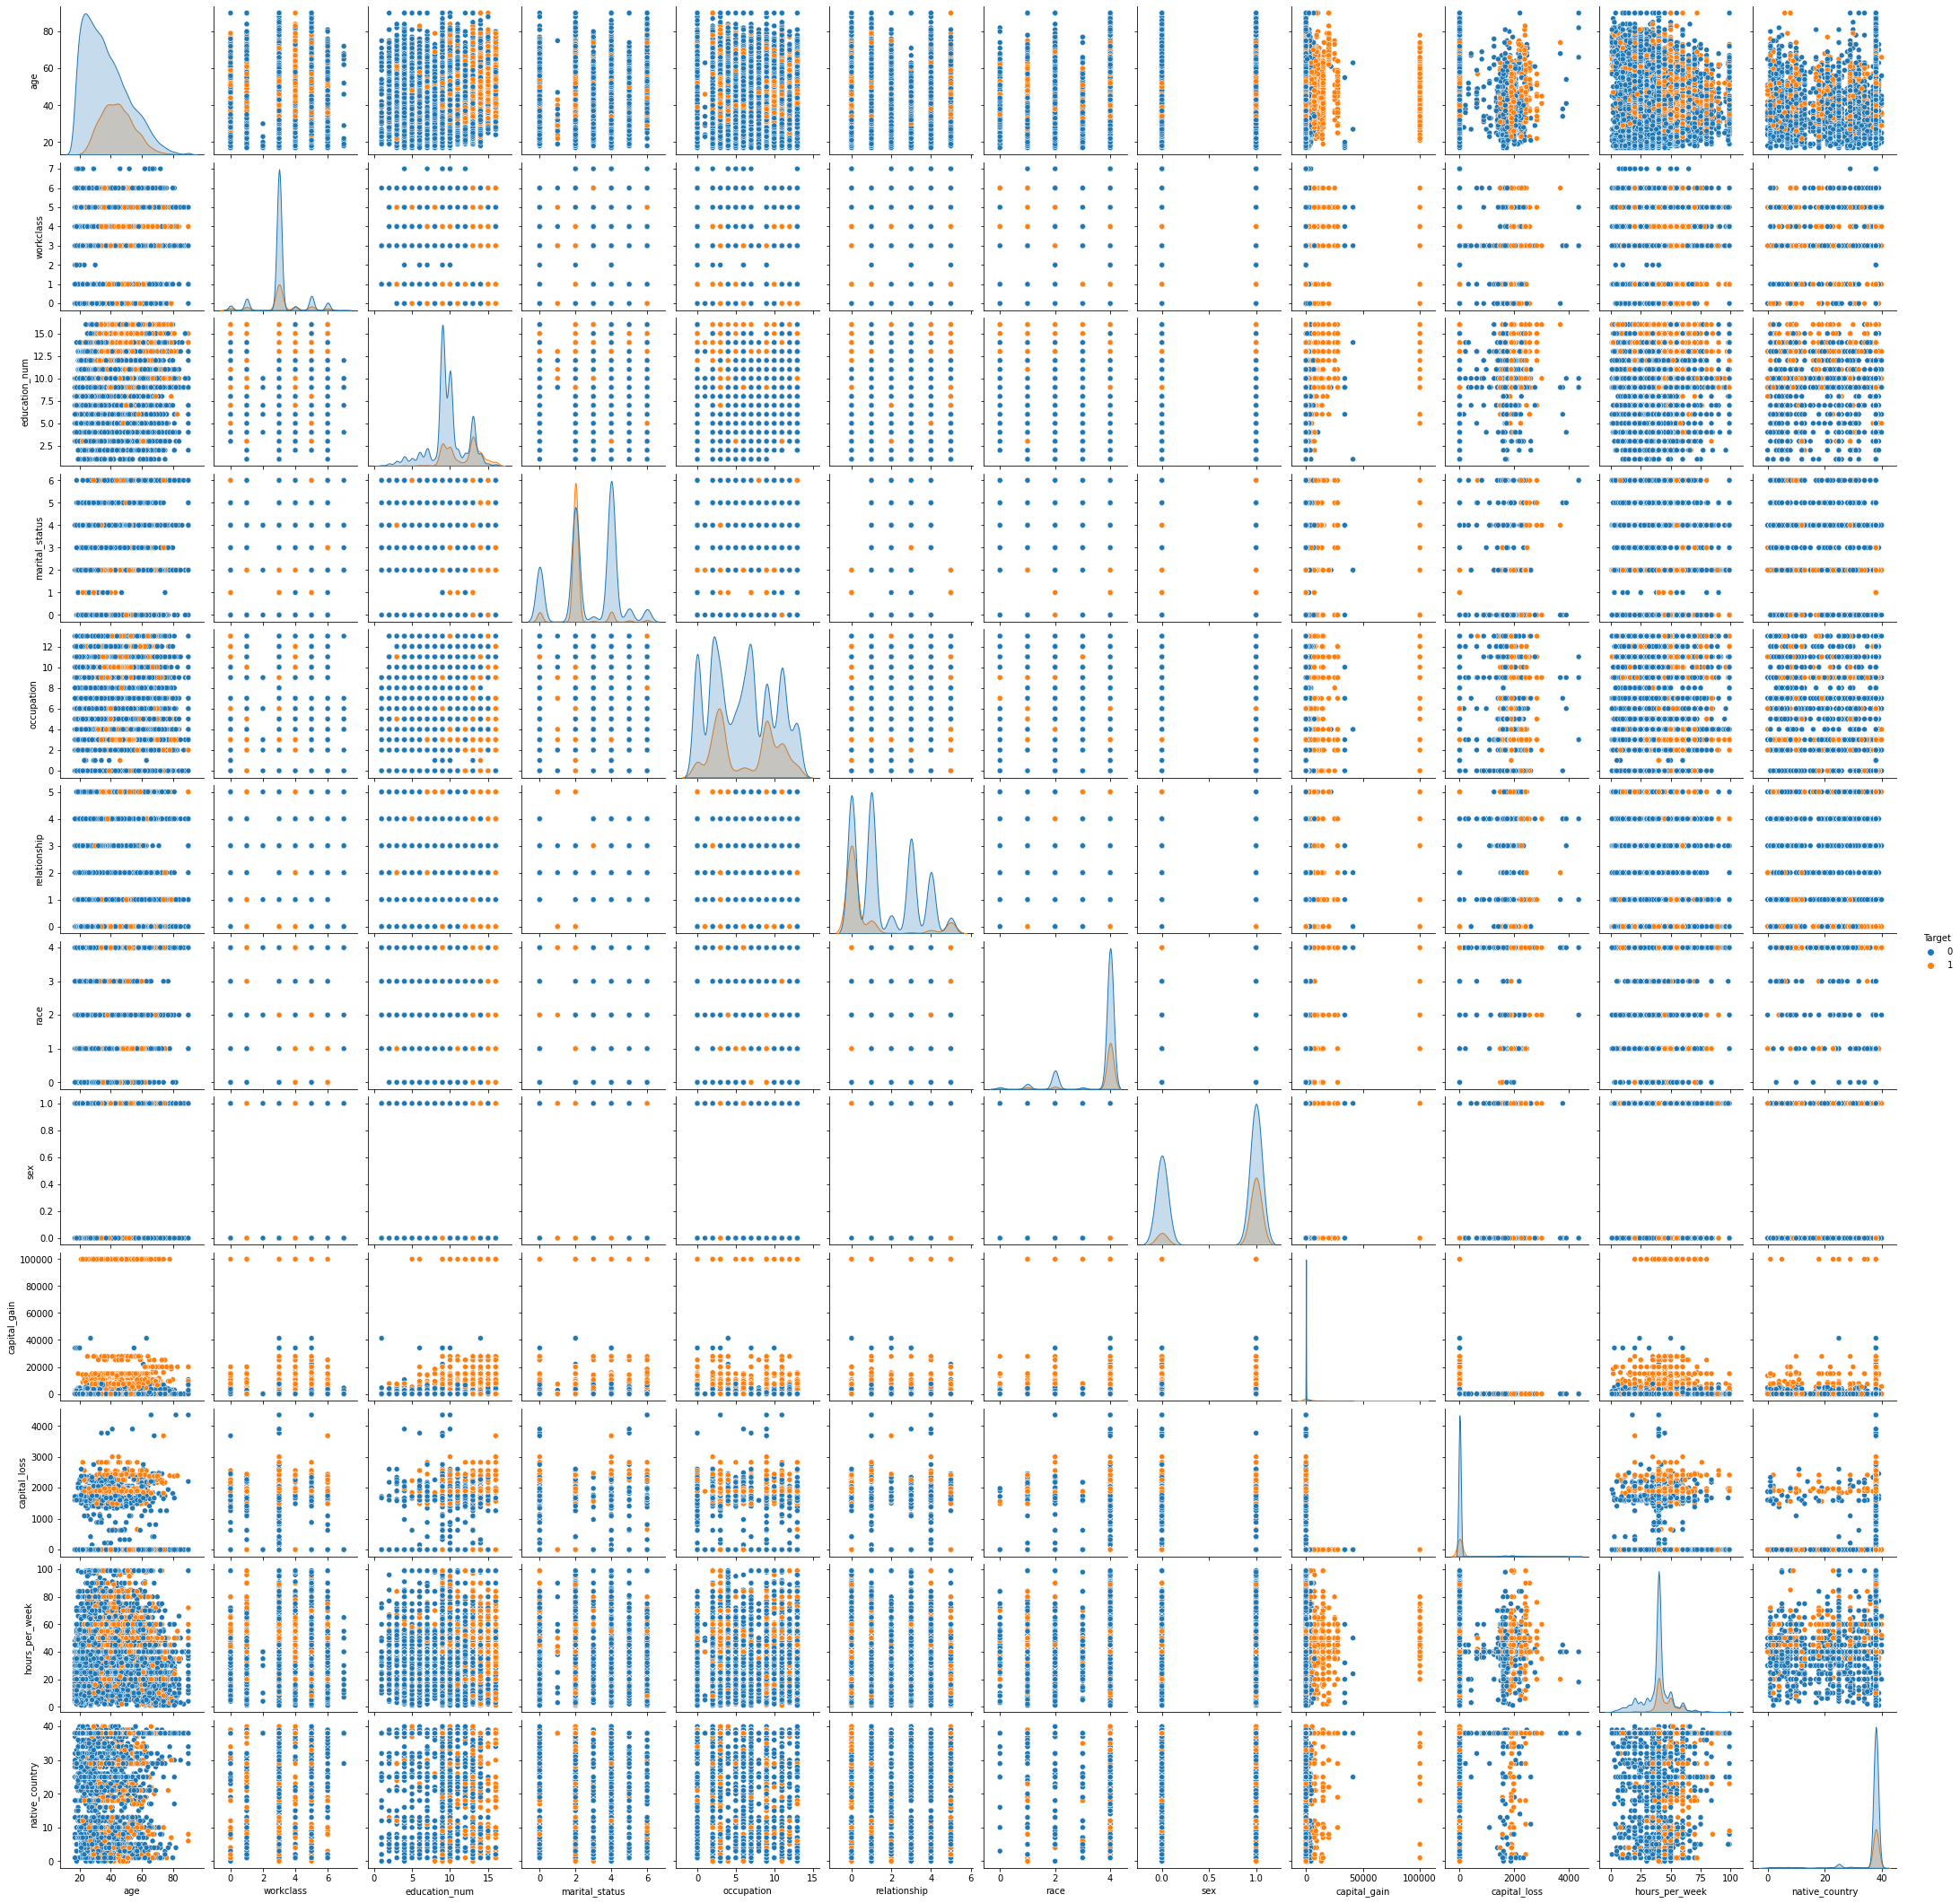

In [222]:
sns.pairplot(df,hue='Target')

### from these we say how we separable based on  the target and how to classify the data

In [223]:
x=df.drop('Target',axis=1)
y=df['Target']

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [225]:
x_train

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
16060,30,3,9,4,2,1,4,1,0,0,40,38
18119,20,3,10,4,5,3,4,1,0,0,25,38
18753,25,3,9,4,2,1,4,1,0,0,35,38
20534,35,1,9,2,10,0,2,1,7298,0,35,38
4585,21,3,9,4,0,1,4,0,0,0,35,38
...,...,...,...,...,...,...,...,...,...,...,...,...
29823,18,3,9,4,5,3,2,1,0,0,40,38
5392,29,6,11,4,12,1,4,0,0,1590,64,38
860,43,3,9,2,4,0,4,1,0,0,40,25
15801,44,1,10,0,3,1,4,1,0,0,50,38


In [226]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Target, Length: 32536, dtype: int32

In [227]:
df['Target'].value_counts()

0    24697
1     7839
Name: Target, dtype: int64

### we seethat imbalance in the data son we balance the daat using smote from imblearn......

In [228]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state = 101)
x_oversample, y_oversample = smote.fit_resample(x, y)

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_oversample, y_oversample, test_size=0.33, random_state=42)

In [230]:
y_oversample.value_counts()

0    24697
1    24697
Name: Target, dtype: int64

### now see we balance the data by oversampling

### now apply the model

In [231]:
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
d=tree.DecisionTreeClassifier()
d.fit(x_train,y_train)


DecisionTreeClassifier()

In [232]:
d.score(x_test,y_test)

0.8492730507330839

In [233]:
x_test

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
4057,46,3,12,2,2,0,4,1,0,0,40,38
31167,21,3,10,4,12,3,4,1,0,0,35,38
22806,20,3,10,4,7,3,4,1,0,0,20,38
14572,26,1,13,4,3,3,4,1,0,0,44,38
11478,38,3,11,2,7,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
20723,24,3,12,2,0,5,4,0,0,0,40,38
30256,38,3,9,5,13,4,2,0,0,0,30,38
24889,45,3,9,2,13,0,4,1,0,0,40,38
38431,42,3,14,2,7,1,4,0,0,1902,60,38


In [234]:
y_pred_train=d.predict(x_train)
y_pred_test=d.predict(x_test)

In [235]:
y_pred_train

array([0, 1, 0, ..., 1, 0, 0])

### train data

In [236]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16484
           1       0.98      0.98      0.98     16609

    accuracy                           0.98     33093
   macro avg       0.98      0.98      0.98     33093
weighted avg       0.98      0.98      0.98     33093



<AxesSubplot:>

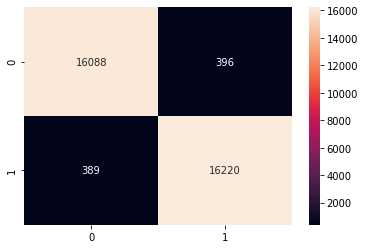

In [237]:
a=confusion_matrix(y_train,y_pred_train)
sns.heatmap(a,annot=True,fmt='g')


In [238]:
ac=accuracy_score(y_train,y_pred_train)
ac

0.9762789713836763

### mis classification/


In [239]:
1-ac

0.023721028616323747

### test data

In [240]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      8213
           1       0.84      0.86      0.85      8088

    accuracy                           0.85     16301
   macro avg       0.85      0.85      0.85     16301
weighted avg       0.85      0.85      0.85     16301



<AxesSubplot:>

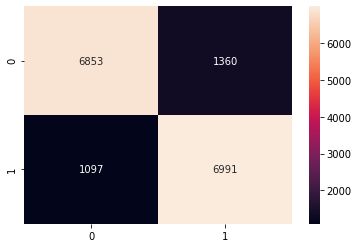

In [241]:
b=confusion_matrix(y_test,y_pred_test)
sns.heatmap(b,annot=True,fmt='g')


### mis classification

In [242]:
ac=accuracy_score(y_test,y_pred_test)
1-ac

0.1507269492669161

### accuracy---85%

## Random forest classifier

In [243]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
r.score(x_test,y_test)


0.8842402306606957

In [244]:
y_pred_train=r.predict(x_train)
y_pred_test=r.predict(x_test)

### train 

In [245]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     16484
           1       0.97      0.99      0.98     16609

    accuracy                           0.98     33093
   macro avg       0.98      0.98      0.98     33093
weighted avg       0.98      0.98      0.98     33093



<AxesSubplot:>

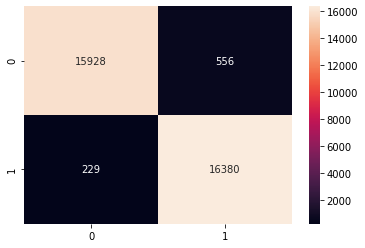

In [246]:
a=confusion_matrix(y_train,y_pred_train)
sns.heatmap(a,annot=True,fmt='g')

In [247]:
ac=accuracy_score(y_train,y_pred_train)
ac

0.9762789713836763

In [248]:
1-ac

0.023721028616323747

### test

In [249]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      8213
           1       0.87      0.91      0.89      8088

    accuracy                           0.88     16301
   macro avg       0.88      0.88      0.88     16301
weighted avg       0.89      0.88      0.88     16301



<AxesSubplot:>

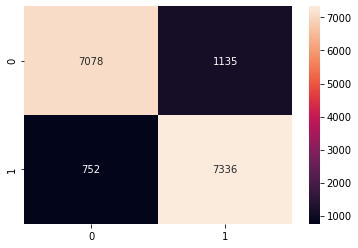

In [250]:
a=confusion_matrix(y_test,y_pred_test)
sns.heatmap(a,annot=True,fmt='g')

In [251]:
ac=accuracy_score(y_test,y_pred_test)
print(ac)
print('mis-classify%','----',1-ac)


0.8842402306606957
mis-classify% ---- 0.11575976933930432


## Logistic Regression

In [252]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)
l.score(x_test,y_test)

C:\Users\63094\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7498926446230293

In [253]:
y_pred_train=l.predict(x_train)
y_pred_test=l.predict(x_test)

### train

In [254]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     16484
           1       0.75      0.77      0.76     16609

    accuracy                           0.75     33093
   macro avg       0.75      0.75      0.75     33093
weighted avg       0.75      0.75      0.75     33093



<AxesSubplot:>

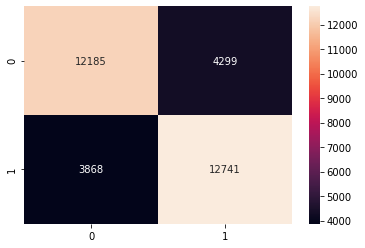

In [255]:
a=confusion_matrix(y_train,y_pred_train)
sns.heatmap(a,annot=True,fmt='g')

In [256]:
ac=accuracy_score(y_train,y_pred_train)
print(ac)
print('mis-classify%','----',1-ac)


0.7532106487776872
mis-classify% ---- 0.24678935122231282


### test

In [257]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      8213
           1       0.74      0.76      0.75      8088

    accuracy                           0.75     16301
   macro avg       0.75      0.75      0.75     16301
weighted avg       0.75      0.75      0.75     16301



<AxesSubplot:>

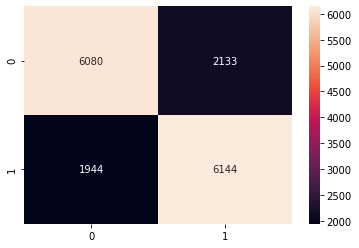

In [258]:
a=confusion_matrix(y_test,y_pred_test)
sns.heatmap(a,annot=True,fmt='g')

In [259]:
ac=accuracy_score(y_test,y_pred_test)
print(ac)
print('mis-classify%','----',1-ac)


0.7498926446230293
mis-classify% ---- 0.2501073553769707


## KNN classifier


In [260]:
 from sklearn.neighbors import KNeighborsClassifier

In [261]:
k=KNeighborsClassifier()
k.fit(x_train,y_train)
k.score(x_test,y_test)

0.85037727746764

In [262]:
y_pred_train=k.predict(x_train)
y_pred_test=k.predict(x_test)

### train

In [263]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     16484
           1       0.86      0.95      0.90     16609

    accuracy                           0.90     33093
   macro avg       0.90      0.90      0.90     33093
weighted avg       0.90      0.90      0.90     33093



<AxesSubplot:>

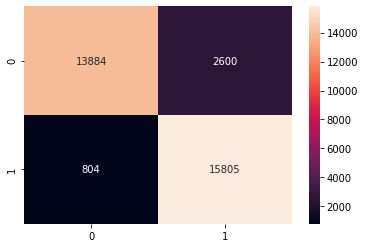

In [264]:
a=confusion_matrix(y_train,y_pred_train)
sns.heatmap(a,annot=True,fmt='g')

In [265]:
ac=accuracy_score(y_train,y_pred_train)
print(ac)
print('mis-classify%','----',1-ac)


0.8971383676306167
mis-classify% ---- 0.10286163236938328


### test

In [266]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      8213
           1       0.80      0.92      0.86      8088

    accuracy                           0.85     16301
   macro avg       0.86      0.85      0.85     16301
weighted avg       0.86      0.85      0.85     16301



<AxesSubplot:>

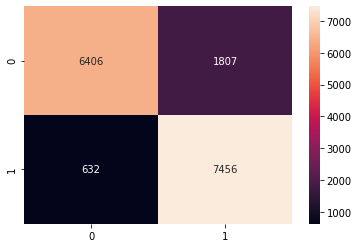

In [267]:
a=confusion_matrix(y_test,y_pred_test)
sns.heatmap(a,annot=True,fmt='g')

In [268]:
ac=accuracy_score(y_test,y_pred_test)
print(ac)
print('mis-classify%','----',1-ac)


0.85037727746764
mis-classify% ---- 0.14962272253235998


### SVC Classifier (with linear kernel)

In [269]:
from sklearn import svm
clf=svm.SVC()

In [270]:
clf.fit(x_train,y_train)

SVC()

In [271]:
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)

### train

In [272]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.58      0.96      0.72     16484
           1       0.87      0.30      0.45     16609

    accuracy                           0.63     33093
   macro avg       0.73      0.63      0.59     33093
weighted avg       0.73      0.63      0.58     33093



<AxesSubplot:>

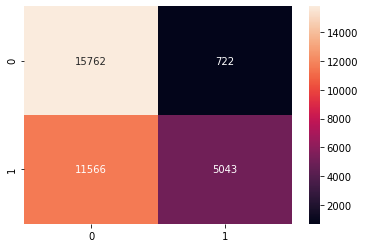

In [273]:
a=confusion_matrix(y_train,y_pred_train)
sns.heatmap(a,annot=True,fmt='g')

In [274]:
ac=accuracy_score(y_train,y_pred_train)
print(ac)
print('mis-classify%','----',1-ac)


0.6286828030096999
mis-classify% ---- 0.3713171969903001


### test

In [275]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.96      0.73      8213
           1       0.88      0.31      0.45      8088

    accuracy                           0.63     16301
   macro avg       0.73      0.63      0.59     16301
weighted avg       0.73      0.63      0.59     16301



<AxesSubplot:>

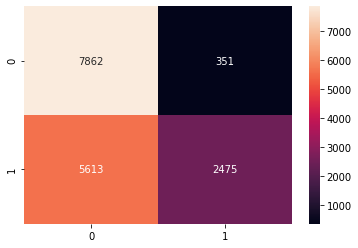

In [276]:
a=confusion_matrix(y_test,y_pred_test)
sns.heatmap(a,annot=True,fmt='g')

In [277]:
ac=accuracy_score(y_test,y_pred_test)
print(ac)
print('mis-classify%','----',1-ac)

0.634132875283725
mis-classify% ---- 0.365867124716275


### finally, we say that random forest classifier gives the best accuracy and give the best predictions.........